In [1]:
import pandas as pd

In [73]:
df = pd.read_csv('/Users/rupaliwadhawan/Downloads/sales_data.csv')

In [74]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [76]:
df.describe()

,Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In [77]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [78]:
# Drop all rows where all values are missing
df.dropna(axis='index',how='all')

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [79]:
# Drop all rows where Product column value is missing
df.dropna(axis='index', subset=['Product'], inplace=True)

In [80]:
df

,Product,Region,Price,Units Sold,Sale Date
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07
...,...,...,...,...,...
1044,Product_48,Region_10,23.57,6.0,2024-02-28
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18


In [81]:
import seaborn as sns

In [82]:
# Create a column Sales 
df['Sales'] = df['Price'] * df['Units Sold']

In [83]:
df

,Product,Region,Price,Units Sold,Sale Date,Sales
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
5,Product_45,Region_1,8.63,11.0,2022-01-06,94.93
6,Product_31,Region_3,23.73,6.0,2022-01-07,142.38
...,...,...,...,...,...,...
1044,Product_48,Region_10,23.57,6.0,2024-02-28,141.42
1045,Product_45,Region_7,78.69,8.0,2022-07-28,629.52
1046,Product_1,Region_6,NaN,8.0,2022-08-02,NaN
1047,Product_17,Region_2,114.37,11.0,2023-12-18,1258.07


In [84]:
# Group by Product and Region to look at the sum of prices, units sold and Sales
df_group = df.groupby(['Product', 'Region']).sum()

In [85]:
df_group

Price  Units Sold   
Product   Region                          
Product_1 Region_1   318.42        42.0  \
          Region_10   88.44         8.0   
          Region_2   131.69        30.0   
          Region_3   268.73        18.0   
          Region_4   197.04        33.0   
...                     ...         ...   
Product_9 Region_5    55.48        25.0   
          Region_6    15.78         0.0   
          Region_7   190.14        11.0   
          Region_8   119.33         9.0   
          Region_9     2.49         9.0   

                                                    Sale Date    Sales  
Product   Region                                                        
Product_1 Region_1   2022-09-232023-07-182023-09-022024-08-22  3071.10  
          Region_10                                2023-04-13   707.52  
          Region_2             2022-01-162022-03-302024-07-20  1363.13  
          Region_3                       2022-11-092023-12-13  2149.84  
          Region_4   2022-01-122022-01-142022-05-212024-09-21  1572.73  
...                                                       ...      ...  
Product_9 Region_5                       2022-12-142024-05-04   885.51  
          Region_6                                 2022-08-27     0.00  
          Region_7                                 2022-10-11  2091.54  
          Region_8                                 2022-06-14  1073.97  
          Region_9                                 2024-01-30    22.41  

[410 rows x 4 columns]

<Axes: xlabel='Product', ylabel='Price'>

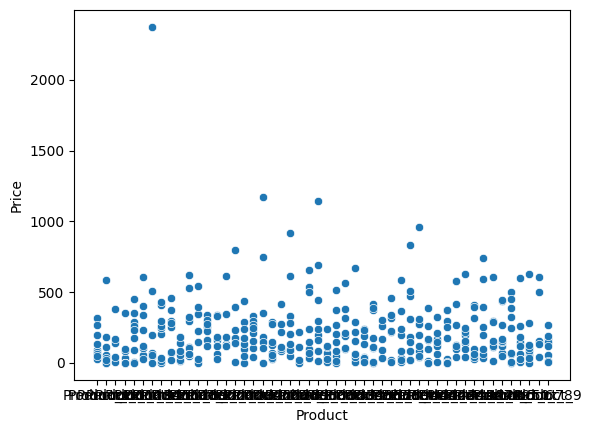

In [86]:
# Create a scatterplot to determine outliers
sns.scatterplot(data=df_group,x='Product',y='Price')

In [90]:
# Drop all records where price is greater than 1000
df.drop(df[df['Price']>1000].index, axis=0, inplace=True)

In [91]:
df[df['Price']>1000]

,Product,Region,Price,Units Sold,Sale Date,Sales


In [92]:
#Group by and sum again
df_group = df.groupby(['Product', 'Region']).sum()

In [95]:
df_group

Price  Units Sold   
Product   Region                          
Product_1 Region_1   318.42        42.0  \
          Region_10   88.44         8.0   
          Region_2   131.69        30.0   
          Region_3   268.73        18.0   
          Region_4   197.04        33.0   
...                     ...         ...   
Product_9 Region_5    55.48        25.0   
          Region_6    15.78         0.0   
          Region_7   190.14        11.0   
          Region_8   119.33         9.0   
          Region_9     2.49         9.0   

                                                    Sale Date    Sales  
Product   Region                                                        
Product_1 Region_1   2022-09-232023-07-182023-09-022024-08-22  3071.10  
          Region_10                                2023-04-13   707.52  
          Region_2             2022-01-162022-03-302024-07-20  1363.13  
          Region_3                       2022-11-092023-12-13  2149.84  
          Region_4   2022-01-122022-01-142022-05-212024-09-21  1572.73  
...                                                       ...      ...  
Product_9 Region_5                       2022-12-142024-05-04   885.51  
          Region_6                                 2022-08-27     0.00  
          Region_7                                 2022-10-11  2091.54  
          Region_8                                 2022-06-14  1073.97  
          Region_9                                 2024-01-30    22.41  

[410 rows x 4 columns]

In [152]:
# Drop all rows where Region column value is missing
df.dropna(axis='index', subset=['Region'], inplace=True)

<Axes: xlabel='Product', ylabel='Price'>

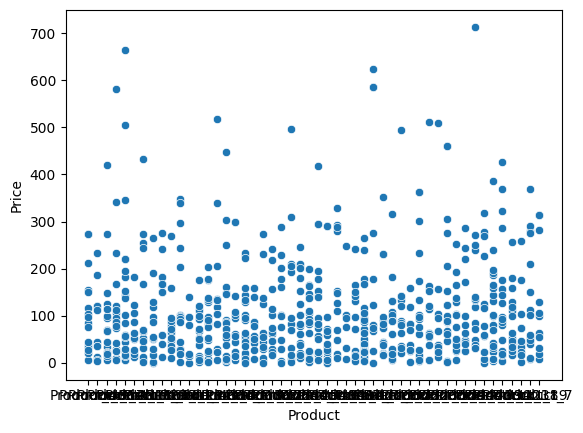

In [153]:
sns.scatterplot(data=df, x="Product", y="Price")

In [107]:
df.to_csv('/Users/rupaliwadhawan/Downloads/Sales_Checkpoint.csv', index=False)

In [142]:
df = pd.read_csv('/Users/rupaliwadhawan/Downloads/Sales_Checkpoint.csv')

In [154]:
df

,Product,Region,Price,Units Sold,Sale Date,Sales,Month
0,Product_46,Region_3,20.43,12.0,2022-01-03,245.16,01
1,Product_36,Region_1,12.77,10.0,2022-01-04,127.70,01
2,Product_17,Region_6,125.69,6.0,2022-01-05,754.14,01
3,Product_45,Region_1,8.63,11.0,2022-01-06,94.93,01
4,Product_31,Region_3,23.73,6.0,2022-01-07,142.38,01
...,...,...,...,...,...,...,...
941,Product_48,Region_10,23.57,6.0,2024-02-28,141.42,02
942,Product_45,Region_7,78.69,8.0,2022-07-28,629.52,07
943,Product_1,Region_6,NaN,8.0,2022-08-02,NaN,08
944,Product_17,Region_2,114.37,11.0,2023-12-18,1258.07,12


In [155]:
df['Month'] = df['Sale Date'].str[5:7]

In [156]:
df.groupby('Month').sum()

,Product,Region,Price,Units Sold,Sale Date,Sales
Month,,,,,,
01,Product_46Product_36Product_17Product_45Produc...,Region_3Region_1Region_6Region_1Region_3Region...,5652.22,776.0,2022-01-032022-01-042022-01-052022-01-062022-0...,52679.58
02,Product_50Product_36Product_43Product_1Product...,Region_4Region_3Region_9Region_9Region_5Region...,6623.19,754.0,2022-02-012022-02-022022-02-032022-02-042022-0...,62645.86
03,Product_12Product_42Product_5Product_18Product...,Region_8Region_10Region_10Region_3Region_9Regi...,7564.19,691.0,2022-03-012022-03-022022-03-042022-03-072022-0...,80277.86
04,Product_48Product_15Product_29Product_13Produc...,Region_6Region_6Region_6Region_3Region_6Region...,7420.92,687.0,2022-04-012022-04-032022-04-042022-04-052022-0...,57178.73
05,Product_47Product_25Product_17Product_47Produc...,Region_4Region_7Region_2Region_7Region_5Region...,7018.72,656.0,2022-05-012022-05-022022-05-032022-05-042022-0...,51618.33
06,Product_39Product_31Product_16Product_33Produc...,Region_5Region_7Region_9Region_10Region_8Regio...,6819.51,780.0,2022-06-012022-06-022022-06-032022-06-042022-0...,66661.60
07,Product_6Product_40Product_38Product_34Product...,Region_1Region_9Region_9Region_2Region_4Region...,9076.59,751.0,2022-07-012022-07-022022-07-052022-07-062022-0...,87255.88
08,Product_19Product_1Product_20Product_15Product...,Region_9Region_6Region_2Region_4Region_9Region...,8220.07,730.0,2022-08-012022-08-022022-08-052022-08-062022-0...,71659.30
09,Product_3Product_19Product_12Product_22Product...,Region_9Region_4Region_1Region_4Region_10Regio...,6341.98,598.0,2022-09-012022-09-022022-09-032022-09-052022-0...,50343.80


<Axes: xlabel='Month', ylabel='Sales'>

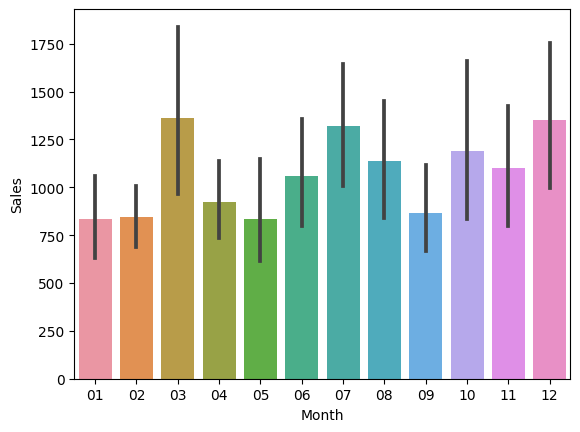

In [157]:
sns.barplot(data=df, x='Month', y='Sales')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852 entries, 0 to 945
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     852 non-null    object 
 1   Region      852 non-null    object 
 2   Price       763 non-null    float64
 3   Units Sold  770 non-null    float64
 4   Sale Date   852 non-null    object 
 5   Sales       686 non-null    float64
 6   Month       852 non-null    object 
dtypes: float64(3), object(4)
memory usage: 53.2+ KB


In [165]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date,Sales,Month
count,852,852,763.000000,770.000000,852,686.000000,852
unique,50,10,NaN,NaN,809,NaN,12
top,Product_5,Region_9,NaN,NaN,2022-07-28,NaN,01
freq,28,101,NaN,NaN,2,NaN,82
mean,NaN,NaN,105.958309,10.097403,NaN,1051.205073,NaN
std,NaN,NaN,106.641950,3.233379,NaN,1137.321320,NaN
min,NaN,NaN,0.200000,2.000000,NaN,0.990000,NaN
25%,NaN,NaN,29.330000,8.000000,NaN,259.710000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN,689.570000,NaN
75%,NaN,NaN,141.530000,12.000000,NaN,1433.587500,NaN


In [173]:
df.groupby(['Product'])['Price'].mean()

Product
Product_1      76.383125
Product_10     68.737333
Product_11     73.550000
Product_12     93.483333
Product_13     88.530000
Product_14    132.018000
Product_15     95.522500
Product_16     99.276316
Product_17     96.292632
Product_18     63.447500
Product_19    126.922941
Product_2     135.143333
Product_20    139.090833
Product_21     95.285714
Product_22    116.490000
Product_23    128.611875
Product_24    118.157500
Product_25    110.250000
Product_26    224.842500
Product_27     78.409286
Product_28     91.932308
Product_29    140.097000
Product_3      52.188571
Product_30    115.308500
Product_31    148.574091
Product_32     63.106000
Product_33     86.831053
Product_34    133.865000
Product_35    116.040769
Product_36     83.146364
Product_37     93.223889
Product_38     73.696667
Product_39    113.652143
Product_4      85.001111
Product_40    142.865556
Product_41    156.025333
Product_42     83.197692
Product_43     64.982778
Product_44     94.071875
Product_45    111

In [170]:
df_group['Price'].mean()

197.18582926829268

In [171]:
df_group['Units Sold'].mean()

18.963414634146343

In [183]:
df['Price'].fillna(197.18, inplace=True)

In [184]:
df['Price'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
941    False
942    False
943    False
944    False
945    False
Name: Price, Length: 852, dtype: bool

In [185]:
df['Units Sold'].fillna(18.96, inplace=True)

In [186]:
df['Units Sold'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
941    False
942    False
943    False
944    False
945    False
Name: Units Sold, Length: 852, dtype: bool

In [187]:
df['Sales'] = df['Price'] * df['Units Sold']

In [189]:
df

,Product,Region,Price,Units Sold,Sale Date,Sales,Month
0,Product_46,Region_3,20.430000,12.0,2022-01-03,245.160000,01
1,Product_36,Region_1,12.770000,10.0,2022-01-04,127.700000,01
2,Product_17,Region_6,125.690000,6.0,2022-01-05,754.140000,01
3,Product_45,Region_1,8.630000,11.0,2022-01-06,94.930000,01
4,Product_31,Region_3,23.730000,6.0,2022-01-07,142.380000,01
...,...,...,...,...,...,...,...
941,Product_48,Region_10,23.570000,6.0,2024-02-28,141.420000,02
942,Product_45,Region_7,78.690000,8.0,2022-07-28,629.520000,07
943,Product_1,Region_6,197.185829,8.0,2022-08-02,1577.486634,08
944,Product_17,Region_2,114.370000,11.0,2023-12-18,1258.070000,12


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852 entries, 0 to 945
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     852 non-null    object 
 1   Region      852 non-null    object 
 2   Price       852 non-null    float64
 3   Units Sold  852 non-null    float64
 4   Sale Date   852 non-null    object 
 5   Sales       852 non-null    float64
 6   Month       852 non-null    object 
dtypes: float64(3), object(4)
memory usage: 53.2+ KB


<Axes: xlabel='Month', ylabel='Sales'>

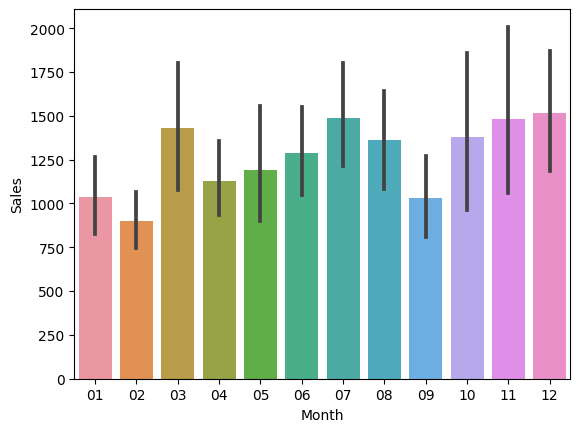

In [192]:
# Barplot showing total sales per month
sns.barplot(data=df,x='Month', y='Sales')

<Axes: xlabel='Region', ylabel='Sales'>

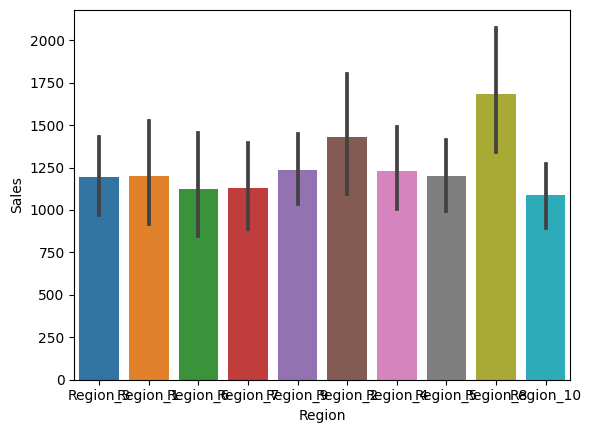

In [194]:
# Barplot showing total sales per region
sns.barplot(data=df, x='Region', y='Sales')

<Axes: xlabel='Product', ylabel='Sales'>

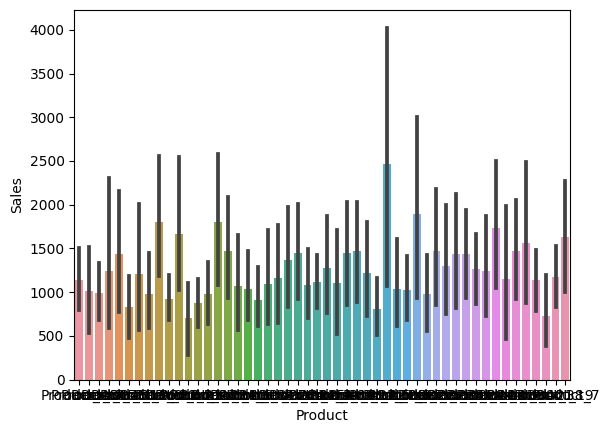

In [195]:
# Barplot showing total sales of each product
sns.barplot(data=df, x='Product', y='Sales')

<Axes: xlabel='Region', ylabel='Product'>

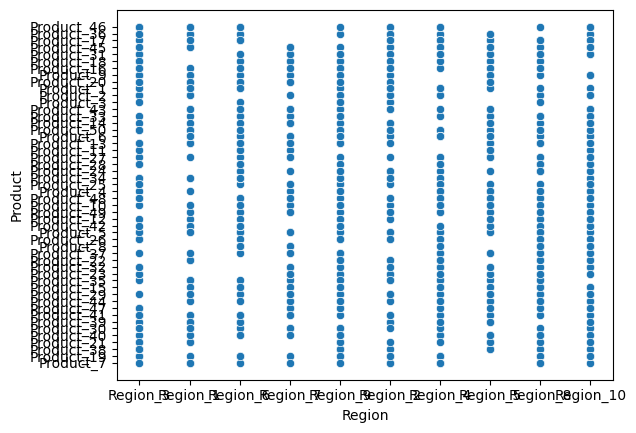

In [202]:
# Scatterplot showing Products sold in each region
sns.scatterplot(data=df, x="Region", y="Product")